In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import mglearn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import time

# Linear Models

Linear models makes prediction using linear functions of the input features.

## Linear Models for Regression

Checking the parameters w and b

w[0]: 0.393906  b: -0.031804


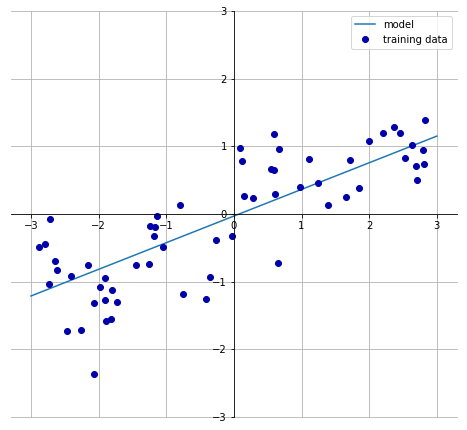

In [2]:
import mglearn
import matplotlib.pyplot as plt
mglearn.plots.plot_linear_regression_wave() # On wave dataset

Prediction is a line for single feature
                plane for two features 
                for more than one feature a hyper plane in higher dimension

# Some popular Linear Models for Regression

## (A) Linear Regression or Ordinary Least Squares

### Creating a linear model

In [3]:
from sklearn.linear_model import LinearRegression # Importing Linear Regression Algorithm
from sklearn.model_selection import train_test_split

In [4]:
X,y=mglearn.datasets.make_wave(n_samples=60)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)
lr=LinearRegression().fit(X_train,y_train) # Creating and fitting the model on the training data

In [53]:
X_train

array([[  1.98900000e+01,   2.02600000e+01,   1.30500000e+02, ...,
          1.61300000e-01,   2.54900000e-01,   9.13600000e-02],
       [  1.28900000e+01,   1.31200000e+01,   8.18900000e+01, ...,
          5.36600000e-02,   2.30900000e-01,   6.91500000e-02],
       [  1.71400000e+01,   1.64000000e+01,   1.16000000e+02, ...,
          2.55000000e-01,   4.06600000e-01,   1.05900000e-01],
       ..., 
       [  1.54600000e+01,   2.39500000e+01,   1.03800000e+02, ...,
          2.16300000e-01,   3.01300000e-01,   1.06700000e-01],
       [  1.70500000e+01,   1.90800000e+01,   1.13400000e+02, ...,
          2.54300000e-01,   3.10900000e-01,   9.06100000e-02],
       [  9.77700000e+00,   1.69900000e+01,   6.25000000e+01, ...,
          5.33400000e-02,   2.53300000e-01,   8.46800000e-02]])

### To find 'w' and 'b' parameters

The "slope" parameter 'w' is stored in coef_ and intercept or 'offset' parameter 'b' is stored in intercept_ attributes

In [5]:
print( "The slope of the line of prediction is {}" .format(lr.coef_))

The slope of the line of prediction is [ 0.39390555]


In [6]:
print("The Offset or y intercept of the line of prediction is {}" .format(lr.intercept_))

The Offset or y intercept of the line of prediction is -0.031804343026759746


### NOTE:

the intercept_ is always a single floating number 
the coef_ is a NumPy array with one entry per feature , as the above wave dataset has only one feature hence lr.coef_ only has single entry.

### Training and Test set performance

For regressor the score method returns R^2 Value

In [7]:
lr.score(X_train,y_train)

0.67008903150757559

In [8]:
lr.score(X_test,y_test)

0.65933685968637001

### The above wave dataset had only one input feature and model was too simple hence underfitting now lets look at a dataset with many features

In [9]:
from sklearn.datasets import load_boston
boston=load_boston()


In [10]:
X_train,X_test,y_train,y_test=train_test_split(boston.data,boston.target,random_state=0)

In [11]:
lr=LinearRegression().fit(X_train,y_train)

In [12]:
lr.score(X_train,y_train)

0.76974483705639396

In [13]:
lr.score(X_test,y_test)

0.63536207866746652

### using Modified Boston House dataset

In [14]:
X,y=mglearn.datasets.load_extended_boston()
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
tic =time.time()
lr=LinearRegression().fit(X_train,y_train)
toc=time.time()
print("The time of execution is {}".format((toc-tic)*1000))


The time of execution is 202.44526863098145


In [15]:
lr.score(X_train,y_train) # high accuracy or R^2 value

0.95235264368642381

In [16]:
lr.score(X_test,y_test)

0.60577548929355474

the difference between the R^2 value is a clear sign of overfitting

## (B) Ridge Regression

Introduction
we want magnitude of 'w' to be as small as possible so that features have a little effect on the outcome,while still predicting well. In ridge regression the coefficients(w) are chosen not only to predict well on the training data but also to fit an additional constraint,all entries of 'w' should be close to zero. This Constraint is an example of regulariztion
REGULARIZATION: means restricting a model to avoid over fitting

###### On Modified Boston Housing DataSet

In [17]:
X,y=mglearn.datasets.load_extended_boston()

#### Implementing Ridge Regression model

In [18]:
from sklearn.linear_model import Ridge
rid=Ridge().fit(X_train,y_train)

In [19]:
rid.score(X_train,y_train)

0.88605785603958354

In [20]:
rid.score(X_test,y_test)

0.75271396003069491

In comparision to linear regression the training score is lower but test score is higher means lower overfit.Means a worse performance on traing set but better generalization. We are only interested in generaliztion so we should choose ridge regression over linear.

## The Alpha parameter

The Ridge model makes a balance between the simplicity of the model and performance on the training set i.e less overfitting and more accuracy on the test set.


More the value of Alpha less the value of 'w' less overfitting less the value of alpha less restricted 'w' more over fitting .
If the value of alpha is very very small,'w' is barely restricted and we end up with a model that resembles to LinearRegression 

### Higher Alpha value(alpha=10)

In [21]:
tic=time.time()
rid10=Ridge(alpha=10).fit(X_train,y_train)
toc=time.time()
print("The time of execution is {}".format((toc-tic)*1000))

The time of execution is 4.142045974731445


In [22]:
print("Accuracy on training set {}".format(rid10.score(X_train,y_train)))
print("Accuracy on test set {}".format(rid10.score(X_test,y_test)))

Accuracy on training set 0.7883461511233251
Accuracy on test set 0.6358967327447731


### Smaller Alpha(alpha=0.1)

In [23]:
rid01=Ridge(alpha=0.1).fit(X_train,y_train)

In [24]:
print("Accuracy on training set {}".format(rid01.score(X_train,y_train)))
print("Accuracy on test set {}".format(rid01.score(X_test,y_test)))

Accuracy on training set 0.9285782082010736
Accuracy on test set 0.7717933688844977


# Checking how alpha changes the model

More the value of alpha parameter less is the 'w'(coefficient value) more restricted the model

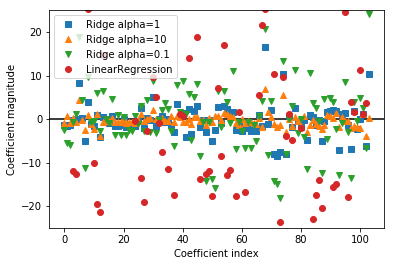

In [25]:
plt.plot(rid.coef_, 's', label="Ridge alpha=1")
plt.plot(rid10.coef_, '^', label="Ridge alpha=10")
plt.plot(rid01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

Above we can see that for higher alpha lesser the coefficient value and dots corresponding to aplha=0.1 have larger magnitude,alpha=1 the coefficient values are somewhat large,for alpha =10 the coefficient are between -3 and 3 , the dots corresponding to linear regression without any regularization(alpha=0) are so large they are outside the chart

## Learning Curve 

#### Learning Curve: plots that show model performance(Accuracy) as a function of datasets size

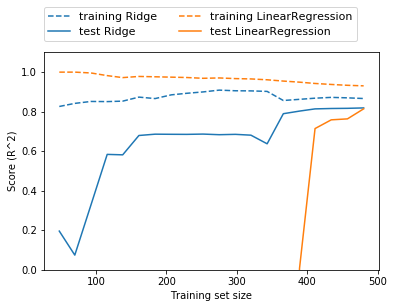

In [26]:
mglearn.plots.plot_ridge_n_samples()

## (C) Lasso

Introduction: using lasso also restricts the coefficient to be close to zero ,but in a slightly different way called L1 Regularization.Consequences of L1 regularization is that when using lasso, some features are exactly zero , meaning some of the features are completely ignored,this makes model easier to interpret and can reveal important features of your model.

In [27]:
from sklearn.linear_model import Lasso
lasso=Lasso().fit(X_train,y_train)

In [28]:
print("The accuracy of training set {}".format(lasso.score(X_train,y_train))) # Modified boston housing dataset

The accuracy of training set 0.29323768991114607


In [29]:
print("The accuracy of test set {}".format(lasso.score(X_test,y_test))) # Modified boston housing dataset

The accuracy of test set 0.20937503255272294


In [30]:
# to check number of features used
np.sum(lasso.coef_!=0)

4

### Alpha parameter of Lasso

In above we used alpha = 1 , so to reduce underfitting we reduce the parameter alpha =0.01.
When we reduce alpha we have to increase the default setting max_iter: maximum number of iterations to run

In [31]:
lasso001=Lasso(alpha=0.01,max_iter=100000).fit(X_train,y_train)

In [32]:
print("The accuracy of training set {}".format(lasso001.score(X_train,y_train))) # Modified boston housing dataset

The accuracy of training set 0.896506955975129


In [33]:
print("The accuracy of test set {}".format(lasso001.score(X_test,y_test))) # Modified boston housing dataset

The accuracy of test set 0.7656489887843521


In [34]:
print("The Number of features used={}".format(np.sum(lasso001.coef_!=0)))

The Number of features used=33


In above a lower alpha means a better fit of a more complex model which worked better on training and testing set . It is slightly better than Ridge and uses 33 features insted of 105. This makes model easier to understand.

#### Futher reducing the lasso parameter alpha behaves as a linear regression model

In [35]:
lasso00001=Lasso(alpha=0.0001,max_iter=100000).fit(X_train,y_train)

In [36]:
print("The accuracy of training set {}".format(lasso00001.score(X_train,y_train))) # Modified boston housing dataset
print("The accuracy of test set {}".format(lasso00001.score(X_test,y_test))) # Modified boston housing dataset
print("The Number of features used={}".format(np.sum(lasso00001.coef_!=0)))

The accuracy of training set 0.9510610436181262
The accuracy of test set 0.6403098994161569
The Number of features used=94


If we set alpha too low, it will remove the effect of regularization and end up overfitting with model similar to Liner Regression

## Checking how alpha parameter of lasso changes the model

Text(0,0.5,'Coefficient magnitude')

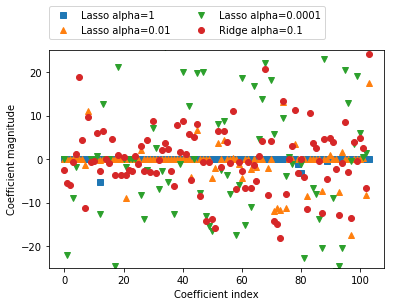

In [37]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(rid01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

Explanation:
for lasso alpha =1 -> most features are ignore and most of the coefficients =0 , remaining coefficients are small in magnitude
for lasso alpha =0.01 -> we obtain a solution shown in green dots in which most features are exactly zero.
for lasso aplha =0.0001 -> we get a quite unregularized model in which most coefficient are non zero and of larger magnitude.
The Ridge model with alpha = 0.1 is similar to lasso alpha = 0.01 but all the coefficients are non zero.

# Linear Models for Classification

For linear models for classification,the decision boundary is the linear function of the input.
A binary linear classifier is a classifier used to separate two classes using a line plane or a hyper plane.
Two most important liner classification algorithms are :
(1) LogisticRegression
(2)Linear support vector machines

### Applying LogisticRegression and LinearSVC models on Forge DataSet and visualize decision boundary

#### Importing LogisticRegression and LinearSVC

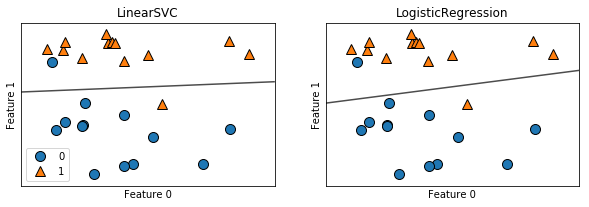

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

Explanation: The decision boundary found by LogisticRegression and LinearSVC , separating the class 1 at top of the boundary and class 0 at bottom .
any new datapoint that lies above the black line will be classified as class by the respective classifier and any point that lies below the black line will be classified as class 0. 
The two models come up with similar decision boundaries.
Both models apply L2 regularization.


# REGULARIZATION PARAMETER 'C'

For LogisticRegression and LinearSVC the parameter that determines strength of regularization is called C.
Lower the value of C more the more regularization more it will force 'w' towards zero.
Higher the value of C less Regularization and LogisticRegression and LinearSVC will try to fit the training data well.

#### Checking the effect of C on Decision boundaries and fitting on training data(effect of C on regularization)

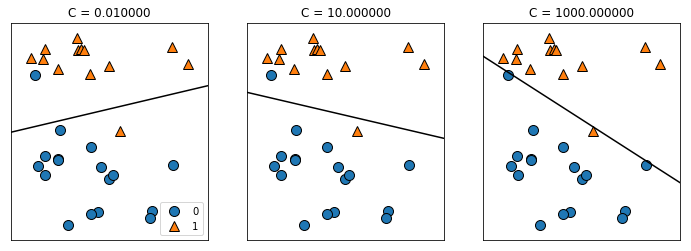

In [39]:
mglearn.plots.plot_linear_svc_regularization()

Explanation:low value of C will cause the algorithms to try to adjust to the "majority" of datapoints , while using a higher value of C stresses the importance that each datapoint will be classified correctly. Above is an illustration using LinearSVC.

For high dimension linear models for classification become verypowerful and guarding against overfitting becomes increasingly important when considering more features

## Considering higher dimension (More number of features)

#### Using LogisticsRegression on Breast Cancer Dataset

In [40]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=42)
logreg=LogisticRegression().fit(X_train,y_train)

In [41]:
# Checking the model accuracy on train set and test set
print("train set score :{:.3f}".format(logreg.score(X_train,y_train)))
print("test set score :{:.3f}".format(logreg.score(X_test,y_test)))

train set score :0.955
test set score :0.958


Explanation : By default the value of C is 1. When C = 1 provides a quite good performance with 95% acuracy on both training and test set. But as Training and test set performance are quite close , it is likely that we are underfitting

### C=100 (Effect on increasing the value of C,reducing Regularization)

In [42]:
logreg100=LogisticRegression(C=100).fit(X_train,y_train)

In [43]:
print("train set score :{:.3f}".format(logreg100.score(X_train,y_train)))
print("test set score :{:.3f}".format(logreg100.score(X_test,y_test)))

train set score :0.972
test set score :0.965


Explanation: using C=100 higher training set accuracy , also test set score is slightly increased , confirming that a more complex model should perform better.

### C=0.01 ( Effect  on reducing the value of C, more underfitting then C=1)

In [44]:
logreg001=LogisticRegression(C=0.01).fit(X_train,y_train)
print("train set score :{:.3f}".format(logreg001.score(X_train,y_train)))
print("test set score :{:.3f}".format(logreg001.score(X_test,y_test)))

train set score :0.934
test set score :0.930


Explanation: even more reducing the value decreases both training and test set accuracy relative to default parameter(C=1), more underfitting an already Underfit model

## Effects on coefficients with three different regularization parameters : L2 Regularization

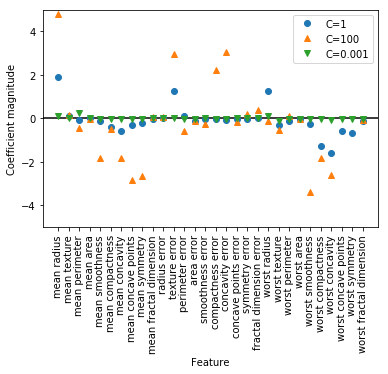

In [45]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

As LogisticRegression applies L2 Regularization,Stronger regularization puses coefficients more and more towards zero , though coefficients never become exactly eqaul to zero. Here positive and negative sign of coefficients not necessarily means it belongs to "maligant" or "benign".


However , the change in sign in the coefficient for "mean perimeter" ( taking as example) means that depending on which model we look at a high "mean perimeter" could be taken as being either indicative of "benign" or indicative of "maligant".


We should never classify the datapoint based on coefficient sign.

### If we desire a more interpretable model , using L1 regularization might help.


using L1 regularization limits the model to using only a few features.

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


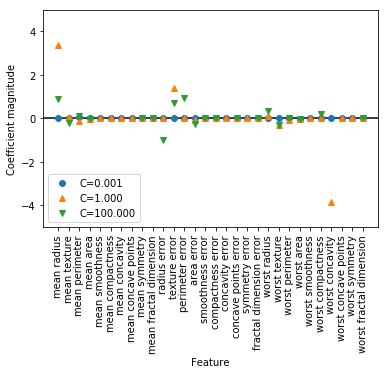

In [46]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")

plt.ylim(-5, 5)
plt.legend(loc=3)

# Linear Models for multiclass classification

To extend a binary clasification to multiclass classification we use 'one -vs.-rest' approach.

#### One-vs.-rest approach

Explanation:
    a binary model is learned for each class that separates that class from rest of the classes,resulting as many bianry models as there are number of classes.

## Three Class classification

applying one vs rest approach to three classification dataset , we use 2D dataset,each class is given by dataset sampled from a gaussian distribution.

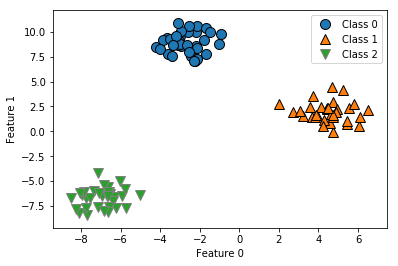

In [47]:
from sklearn.datasets import make_blobs
X,y=make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0',"Class 1",'Class 2'])

In [48]:
# train LinearSVC on the dataset
linear_svm=LinearSVC().fit(X,y)

#### Checking the coefficients and intercept 

In [49]:
print("Coefficient values :{}".format(linear_svm.coef_))
print("Shape of the coefficients matrix {}".format(linear_svm.coef_.shape))

Coefficient values :[[-0.17492726  0.23140972]
 [ 0.47621823 -0.06937271]
 [-0.18914334 -0.20399622]]
Shape of the coefficients matrix (3, 2)


This shows that shape of coef_ is(3,2) meaning each roe of coef_ contains coefficient vecotor for one of the three classes
and each column contains coefficient for each feature

In [50]:
print("Intercept Shape {}".format(linear_svm.intercept_.shape))

Intercept Shape (3,)


The intercept_ is a one dimeansional array , storing intercets for each class

### Decision boundaries made by the three binary classifier

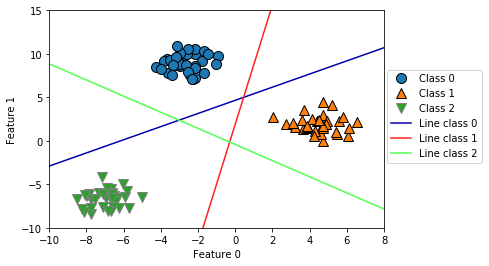

In [51]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))

here we actually dont have a clear picture of which class do the points if lying in the centre triangle or the triangles at the side will belong , so we have to define regions so that we can clearly classify new points based on the regions in which they may lie.

#### Prediction of all regions in 2D space

Text(0,0.5,'Feature 1')

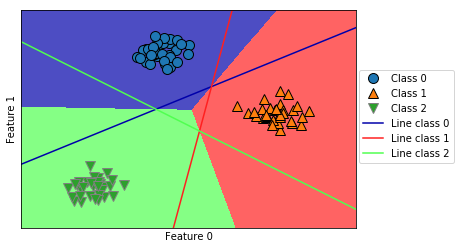

In [52]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

The regions are formed using the formula of classification, any region is defined by the highest value classification formula : class of the closest line. 